In [65]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint

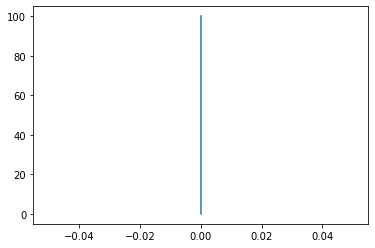

In [78]:
q=72#number of surface proteins
Ccmc=0.2*10**(-6) #critical concentration,mole
alpha=2 #line energy kT 
beta=70*10**(6) #rate of attachment, Hz/meter
c1t0=10.0*10**(-6) #initial concentration, mole
Rh=0.619*10**(-6) #hydrodynamic radius, meter, estimated for 300 amino acid protein
R=np.sqrt(q)*Rh/2 #estimate for spherical capsid radius
T=293 #room temp, K
k=1.38064852*10**(-23) #boltzmann constant
Z= 0.9544*10**(-3) #viscosity room temp water, pascals
D1=k*T/(6*np.pi*Rh*Z)#diffusion coefficient
j=D1*2*R/q

initCn= [0]*q #empty conditions

initCn[0]=c1t0#adding initial concentration of subunits

t=np.linspace(0,100,101)#time values


def Jn(n,C1,Cn,Cnp1):
    J=C1*j*np.sqrt(n*(q-n))*(Cn-Cnp1*Ccmc/(C1*2)*np.exp(alpha*(np.sqrt((n+1)*(q-n-1))-np.sqrt(n*(q-n)))))
    return(J)

dcdt=[0]#initializes dcdt
def Con(Cn,t):
    i=1
    dcdt=[0]*q#intializes q size list of zeros
    dcdt[0]=-Jn(1,Cn[0],Cn[0],Cn[1])
    while i < q:#goes from 0 to 
        n=i+1
        if n == q:
            dcdt[i]=(Jn(q-1,Cn[0],Cn[i],0))
        else:
            dcdt[i]=(Jn(i,Cn[0],Cn[i-1],Cn[n-1])-Jn(n,Cn[0],Cn[i],Cn[n]))
        i+=1
    
    return(dcdt)

x=odeint(Con,initCn,t)#integrates rates to give txq matrix of concetrations of each size of capsid at each time step
Cq= x[:,q-1]#concentration of complete capsids as a function of time

plt.plot(Cq,t)
plt.show()